In [5]:
#importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
#reading the data
data = pd.read_csv("startup_funding.csv")
data.head()

,Sr No,Date dd/mm/yyyy,Startup Name,Industry Vertical,SubVertical,City Location,Investors Name,InvestmentnType,Amount in USD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [7]:
data.columns

Index(['Sr No', 'Date dd/mm/yyyy', 'Startup Name', 'Industry Vertical',
       'SubVertical', 'City  Location', 'Investors Name', 'InvestmentnType',
       'Amount in USD', 'Remarks'],
      dtype='object')

In [8]:
#changing the column names
data.columns = ['SNo', 'Date', 'StartupName', 'IndustryVertical',
       'SubVertical', 'City', 'Investors', 'InvestmentnType',
       'AmountUSD', 'Remarks']
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,Investors,InvestmentnType,AmountUSD,Remarks
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000",NaN
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394",NaN
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860",NaN
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000",NaN
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000",NaN


In [9]:
#checking the percentage of null values
data.isnull().sum()/len(data) * 100

SNo                  0.000000
Date                 0.000000
StartupName          0.000000
IndustryVertical     5.617608
SubVertical         30.749014
City                 5.913272
Investors            0.788436
InvestmentnType      0.131406
AmountUSD           31.537451
Remarks             86.235217
dtype: float64

In [10]:
#removing "Remarks" field as 86% of the values are null
data.drop("Remarks", axis = 1, inplace = True)
data.head()

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,Investors,InvestmentnType,AmountUSD
0,1,09/01/2020,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,"20,00,00,000"
1,2,13/01/2020,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,"80,48,394"
2,3,09/01/2020,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,"1,83,58,860"
3,4,02/01/2020,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,"30,00,000"
4,5,02/01/2020,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,"18,00,000"


In [11]:
data.dtypes

SNo                  int64
Date                object
StartupName         object
IndustryVertical    object
SubVertical         object
City                object
Investors           object
InvestmentnType     object
AmountUSD           object
dtype: object

In [12]:
pd.to_datetime(data["Date"])

C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '13/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '17/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetim

ParserError: year 72018 is out of range: 05/072018

In [13]:
#As there are errors in date column, checking all invalid dates in the "Date" field
from dateutil.parser import parse

def is_date(string):
    try: 
        parse(string, fuzzy=False)
        return True

    except ValueError:
        return False

data[ ~ data["Date"].apply(is_date)]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,Investors,InvestmentnType,AmountUSD
192,193,05/072018,Loan Tap,Consumer Internet,Online Lending Platform For Salaried Professio...,Mumbai,"Shunwei Capital, Tuscan Ventures, Ashish Goenk...",Private Equity,"62,50,000"
2606,2607,\\xc2\\xa010/7/2015,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000"
2775,2776,12/05.2015,Mobiefit,Mobile Fitness App,NaN,Goa,Prototyze,Seed Funding,NaN
2776,2777,12/05.2015,Plancess,Online Education Platform,NaN,Mumbai,"Rajendra Gogri,\\xc2\\xa0 Chandrakant Gogri",Seed Funding,"20,00,000"
2831,2832,13/04.2015,The Porter,Logistics Tech,NaN,Mumbai,Kae Capital,Seed Funding,"5,00,000"
3011,3012,15/01.2015,Wishberry,NaN,NaN,NaN,"Rajan Anandan, Shankar Mahadevan, Deep Kalra &...",Seed Funding,"6,50,000"
3029,3030,22/01//2015,Corporate360,NaN,NaN,NaN,Group of Angel Investors,Seed Funding,"2,00,000"


In [14]:
#there are few invalid date formats used and as the count of errors are less, manually changing these
#at SNo 2607 few xe2 xa0 characters are identified. Cleaning those in the next steps
data["Date"][data["Date"] == "05/072018"] = "05/07/2018"
data["Date"][data["Date"] == "\\\\xc2\\\\xa010/7/2015"] = "10/7/2015"
data["Date"]=data["Date"].str.replace(".","/")
data["Date"][data["Date"] == "22/01//2015"] = "22/01/2015"

C:\Users\prave\AppData\Local\Temp\ipykernel_5212\2848951913.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"][data["Date"] == "05/072018"] = "05/07/2018"
C:\Users\prave\AppData\Local\Temp\ipykernel_5212\2848951913.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"][data["Date"] == "\\\\xc2\\\\xa010/7/2015"] = "10/7/2015"
C:\Users\prave\AppData\Local\Temp\ipykernel_5212\2848951913.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data[

In [15]:
#checking the errors again
data[ ~ data["Date"].apply(is_date)]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,Investors,InvestmentnType,AmountUSD


In [16]:
data["Date"].astype("datetime64[ns]")

C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '17/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetim

OutOfBoundsDatetime: Out of bounds nanosecond timestamp: 15-01-07 00:00:00

In [17]:
#one more error found and cleaning it
data["Date"][data["Date"] == "01/07/015"] = "01/07/2015"

C:\Users\prave\AppData\Local\Temp\ipykernel_5212\223732590.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Date"][data["Date"] == "01/07/015"] = "01/07/2015"


In [18]:
#so all the errors in the dates were cleaned. So now changing the datatype of "Date" column to Date from object
data["Date"] = data["Date"].astype("datetime64[ns]")

C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/01/2020' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '13/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetimes.py:1063: UserWarning: Parsing '17/12/2019' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\prave\anaconda3\envs\pandas_playground\lib\site-packages\pandas\core\tools\datetim

In [19]:
data.dtypes

SNo                          int64
Date                datetime64[ns]
StartupName                 object
IndustryVertical            object
SubVertical                 object
City                        object
Investors                   object
InvestmentnType             object
AmountUSD                   object
dtype: object

In [20]:
data[data["SNo"] == 2607]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,Investors,InvestmentnType,AmountUSD
2606,2607,2015-10-07,\\xc2\\xa0Infinity Assurance,\\xc2\\xa0Warranty Programs Service Administra...,NaN,\\xc2\\xa0New Delhi,\\xc2\\xa0Indian Angel Network,Seed Funding,"\\xc2\\xa0600,000"


In [21]:
#As few xe2 xa0 characters are identified, they are invisible non breaking spaces (kind of invisible control character) in UTF-8 encodings. So defining a function to replace these characters with an empty string
def clean_str(x):
    return str(x).replace("\\xc2\\xa0","").replace("\\\\xc2\\\\xa0","")

cat_col = list(data.columns[data.dtypes == object])
for i in cat_col:
    data[i] = data[i].apply(clean_str)

In [22]:
data[data["SNo"] == 2607]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,Investors,InvestmentnType,AmountUSD
2606,2607,2015-10-07,Infinity Assurance,Warranty Programs Service Administration,nan,New Delhi,Indian Angel Network,Seed Funding,"600,000"


In [23]:
#checking the amount column,
pd.set_option('display.max_rows', 500)
data["AmountUSD"].value_counts().head(500)

nan               960
10,00,000         165
5,00,000          108
20,00,000          69
30,00,000          66
50,00,000          66
1,00,00,000        60
1,00,000           57
1,50,000           45
2,00,000           44
2,50,000           41
60,00,000          40
1,50,00,000        39
15,00,000          37
40,00,000          35
3,00,000           31
25,00,000          25
5,00,00,000        24
6,00,000           23
4,00,000           21
2,00,00,000        21
12,00,000          20
3,00,00,000        19
2,50,00,000        18
10,00,00,000       17
4,50,000           17
70,00,000          16
1,20,00,000        15
3,50,000           14
7,50,000           13
1,60,00,000        12
80,00,000          12
45,00,000          12
1,10,00,000        11
11,00,000          11
35,00,000          11
6,50,000           10
50,000             10
13,00,000          10
3,50,00,000         9
31,00,000           9
7,00,000            9
75,00,000           8
1,20,000            8
1,80,000            8
6,00,00,00

In [24]:
#Converting the amount column into numerical, to analyze the values inside it
# replacing "undisclosed", "Undisclosed", "unknown" amounts with -9999 to identify 
def clean_amount(x):
    x = str(x).replace(",","").replace("+","").replace(".","")
    x = str(x).lower().replace("nan","")
    x = str(x).lower().replace("n/a","")
    if x == "undisclosed" or x == "Undisclosed" or x == "unknown" :
        x = -9999
    if x == '':
        x = '-999'
    return x

data["AmountUSD"] = data["AmountUSD"].apply(clean_amount)

In [25]:
data["AmountUSD"] = data["AmountUSD"].astype(float)
data["AmountUSD"].value_counts()

-9.990000e+02    964
 1.000000e+06    166
 5.000000e+05    108
 2.000000e+06     69
 5.000000e+06     67
 3.000000e+06     66
 1.000000e+07     61
 1.000000e+05     57
 1.500000e+05     45
 2.000000e+05     44
 2.500000e+05     41
 6.000000e+06     40
 1.500000e+07     39
 1.500000e+06     37
 4.000000e+06     35
 3.000000e+05     32
 2.500000e+06     25
 5.000000e+07     24
 6.000000e+05     24
 2.000000e+07     22
 4.000000e+05     21
 1.200000e+06     20
 3.000000e+07     19
 2.500000e+07     18
 4.500000e+05     17
 1.000000e+08     17
 7.000000e+06     16
 1.200000e+07     15
 3.500000e+05     14
 7.500000e+05     13
 8.000000e+06     12
 1.600000e+07     12
 4.500000e+06     12
 1.100000e+06     12
 3.500000e+06     11
 1.300000e+06     11
 1.100000e+07     11
 6.500000e+05     10
 5.000000e+04     10
 7.000000e+05      9
 3.100000e+06      9
 3.500000e+07      9
 7.500000e+06      8
 1.200000e+05      8
 6.000000e+07      8
 1.800000e+05      8
 1.400000e+06      7
 5.500000e+06

### Visualizing the changes in the Funding Ecosystem changes with respect to Time

In [26]:
year_month = ((data["Date"].dt.year * 100)+(data["Date"].dt.month)).value_counts().sort_index()
index = [str(i) for i in year_month.index]
index

['201501',
 '201502',
 '201503',
 '201504',
 '201505',
 '201506',
 '201507',
 '201508',
 '201509',
 '201510',
 '201511',
 '201512',
 '201601',
 '201602',
 '201603',
 '201604',
 '201605',
 '201606',
 '201607',
 '201608',
 '201609',
 '201610',
 '201611',
 '201612',
 '201701',
 '201702',
 '201703',
 '201704',
 '201705',
 '201706',
 '201707',
 '201708',
 '201709',
 '201710',
 '201711',
 '201712',
 '201801',
 '201802',
 '201803',
 '201804',
 '201805',
 '201806',
 '201807',
 '201808',
 '201809',
 '201810',
 '201811',
 '201812',
 '201901',
 '201902',
 '201903',
 '201904',
 '201905',
 '201906',
 '201908',
 '201909',
 '201910',
 '201911',
 '201912',
 '202001',
 '202002',
 '202009',
 '202010']

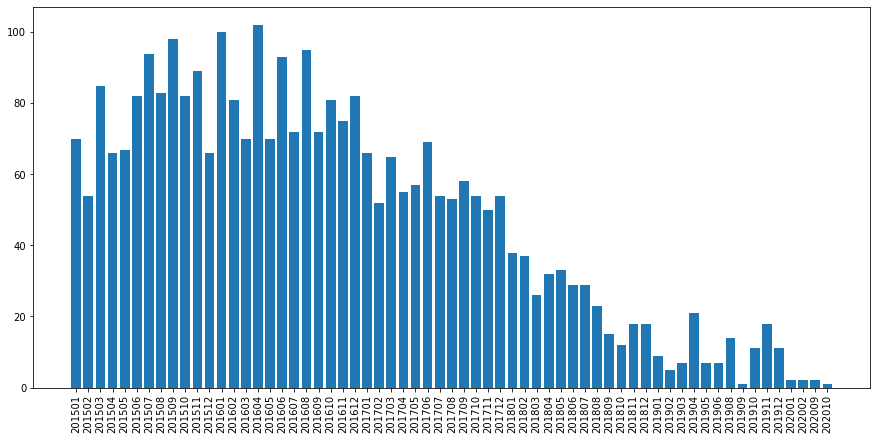

In [27]:
fig,ax = plt.subplots(figsize = (15,7))
ax.bar(index,year_month.values)
ax.tick_params(axis = "x",labelrotation=90)



#### Inference from the above plot: No of fundings have declined over the period especially after 2016

### Finding more about the fundings that Startups get

In [28]:
#Finding the maximum amount that Startups get
data["AmountUSD"].max()

3900000000.0

In [29]:
#Checking different ventures of paytm
data[data["StartupName"] == "Paytm"]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,Investors,InvestmentnType,AmountUSD
31,32,2019-11-25,Paytm,FinTech,Mobile Wallet,Noida,Vijay Shekhar Sharma,Funding Round,1.000000e+09
251,252,2018-06-26,Paytm,Technology,Digital Payment Platform,Noida,One 97 Communications,Private Equity,8.950000e+06
830,831,2017-05-18,Paytm,ECommerce,Mobile Wallet & ECommerce platform,Bangalore,SoftBank Group,Private Equity,1.400000e+09
1493,1494,2016-08-30,Paytm,eCommerce,Mobile Wallet & ECommerce platform,Bangalore,MediaTek Inc.,Private Equity,6.000000e+07
2459,2460,2015-09-29,Paytm,E-Commerce & M-Commerce platform,nan,New Delhi,"Alibaba Group, Ant Financial",Private Equity,6.800000e+08
2890,2891,2015-03-13,Paytm,nan,nan,nan,Ratan Tata,Private Equity,-9.990000e+02
2948,2949,2015-05-02,Paytm,nan,nan,nan,Ant Financial Services (Alipay),Private Equity,-9.990000e+02


In [30]:
#Checking different ventures of Flipkart
data[data["StartupName"] == "Flipkart"]

,SNo,Date,StartupName,IndustryVertical,SubVertical,City,Investors,InvestmentnType,AmountUSD
651,652,2017-11-08,Flipkart,eCommerce,Online Marketplace,Bangalore,Softbank,Private Equity,2.500000e+09
773,774,2017-06-26,Flipkart,eCommerce,Online marketplace,Bangalore,Naspers,Private Equity,7.100000e+07
966,967,2017-03-21,Flipkart,eCommerce,ECommerce Marketplace,Bangalore,"Microsoft, eBay, Tencent Holdings",Private Equity,1.400000e+09
1032,1033,2017-02-20,Flipkart,eCommerce,Online Marketplace,Bangalore,"Bennett, Coleman and Co. Ltd (BCCL)",Private Equity,3.870000e+07
2689,2690,2015-04-06,Flipkart,eCommerce platform,nan,Bangalore,Morgan Stanley,Private Equity,5.000000e+07


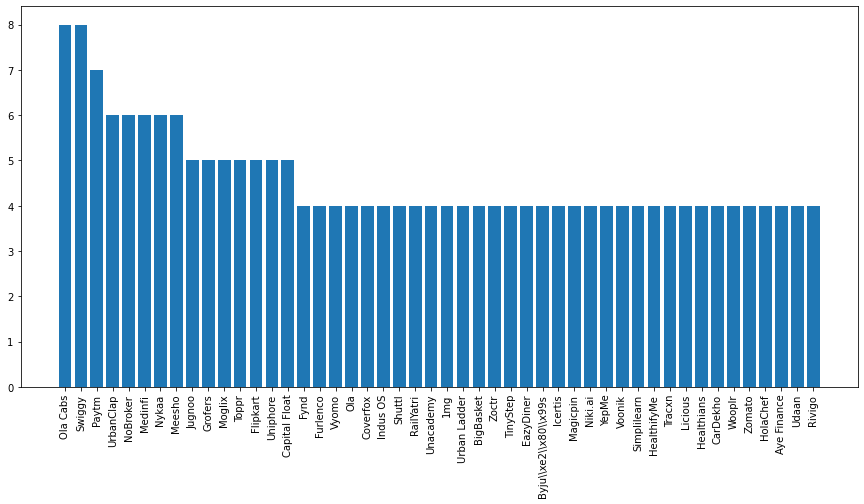

In [31]:
#Startups having more than 4 rounds of funding
NoofFundings = data["StartupName"].value_counts()
NoofFundings = NoofFundings[NoofFundings >= 4]
fig,ax = plt.subplots(figsize = (15,7))
ax.bar(NoofFundings.index,NoofFundings.values)
ax.tick_params(axis = "x",labelrotation=90)

### Finding the kind of industries that are most funded

In [32]:
#top 5 most funded industries based on the amount invested
data[["IndustryVertical","AmountUSD"]].groupby(by = "IndustryVertical").sum().sort_values(by = "AmountUSD",ascending = False).head()

,AmountUSD
IndustryVertical,
Consumer Internet,6.252733e+09
eCommerce,5.002473e+09
Transportation,3.916632e+09
Technology,2.229540e+09
Finance,1.971433e+09


In [33]:
#top 5 funded sub verticals based on the amount invested
sub = data[["SubVertical","AmountUSD"]].groupby(by = "SubVertical").sum().sort_values(by = "AmountUSD",ascending = False).head(6)
sub.tail(5)


,AmountUSD
SubVertical,
Bike Taxi,3.900000e+09
Online Marketplace,2.648700e+09
ECommerce Marketplace,1.700000e+09
E-Books,1.510950e+09
Mobile Wallet & ECommerce platform,1.460000e+09


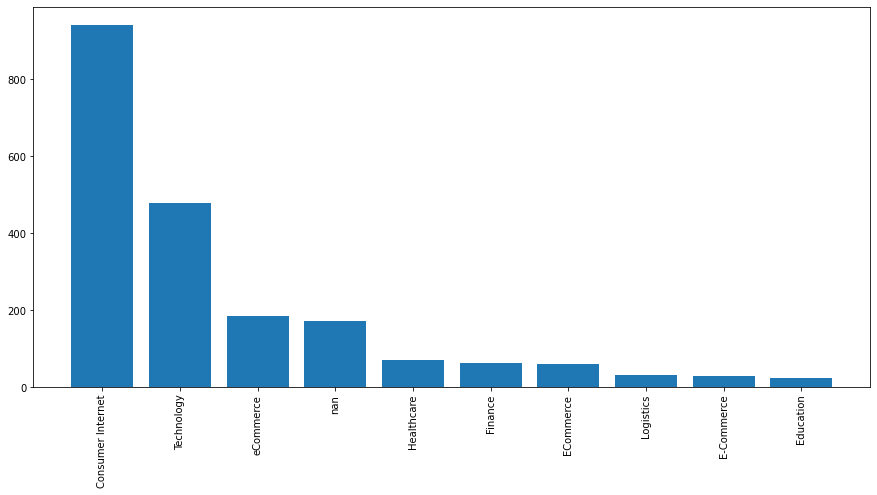

In [34]:
#top 10 funded verticals based on the number of times the investment is made on the verticals
IVC = data["IndustryVertical"].value_counts().head(10)
fig,ax = plt.subplots(figsize = (15,7))
ax.bar(IVC.index,IVC.values)
ax.tick_params(axis = "x",labelrotation=90)

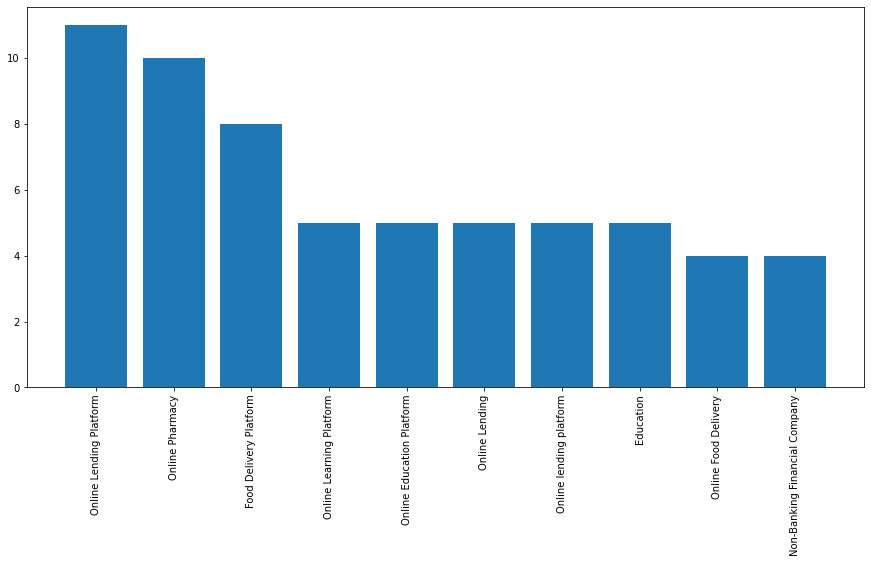

In [35]:
#top 10 funded verticals based on the number of times the investment is made on the Sub verticals
SVC = data["SubVertical"].value_counts()[1:].head(10)
fig,ax = plt.subplots(figsize = (15,7))
ax.bar(SVC.index,SVC.values)
ax.tick_params(axis = "x",labelrotation=90)

### Finding the most funded Startup locations

In [36]:
data["City"].value_counts()

Bangalore                 701
Mumbai                    568
New Delhi                 424
Gurgaon                   291
nan                       180
Bengaluru                 141
Pune                      105
Hyderabad                  99
Chennai                    97
Noida                      93
Gurugram                   50
Ahmedabad                  38
Delhi                      34
Jaipur                     30
Kolkata                    21
Indore                     13
Chandigarh                 11
Vadodara                   10
Goa                        10
Singapore                   8
Coimbatore                  5
Kanpur                      4
Pune / US                   4
Bhopal                      3
Faridabad                   3
Nagpur                      3
New Delhi / US              2
Bangalore / SFO             2
Agra                        2
Udaipur                     2
Ahemadabad                  2
Siliguri                    2
Bangalore/ Bangkok          2
Trivandrum

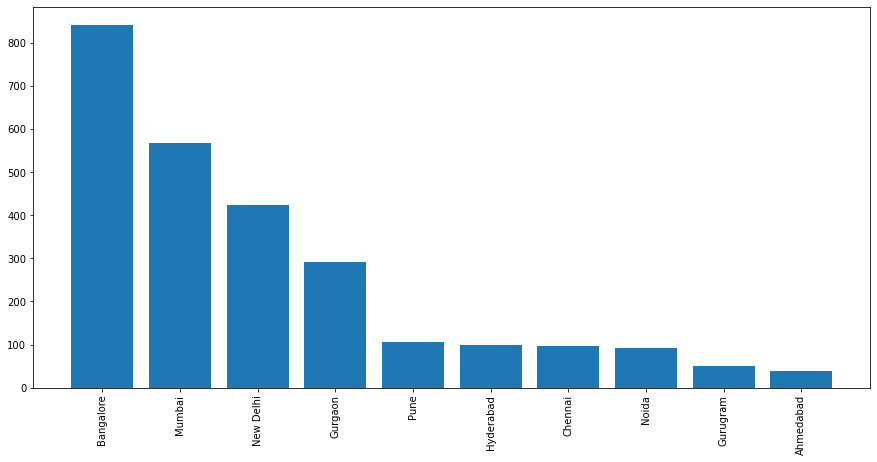

In [37]:
data["City"] = data["City"].str.replace("Bengaluru","Bangalore")
loc = data["City"][data["City"] != "nan"].value_counts().head(10)
fig,ax = plt.subplots(figsize = (15,7))
ax.bar(loc.index,loc.values)
ax.tick_params(axis = "x",labelrotation=90)

#### Inference from the above plot: Most of the Startups are from Bangalore, Mumbai, New Delhi, Gurgaon and Pune

### Finding the people who plays the main role in Startup Ecosystem

In [38]:
#finding the top 10 investors based on the number of startups they have invested
data["Investors"].value_counts()

Undisclosed Investors                                                              39
Undisclosed investors                                                              30
Ratan Tata                                                                         25
Indian Angel Network                                                               24
nan                                                                                24
                                                                                   ..
Samridhi Fund                                                                       1
Malini Patel, Stelcore Management Services, Anjani Prasad                           1
Om Chaudhry                                                                         1
Meher Roy, Nikhil Arora, Meet Kanodia, Krit Sankalp, Nitish Singh, Risabh Gupta     1
UK based Group of Angel Investors                                                   1
Name: Investors, Length: 2409, dtype: int64

In [39]:
data["Investors"] = data["Investors"].str.replace("Undisclosed investors","Undisclosed Investors").replace("Undisclosed Investor","Undisclosed Investors").replace("Undisclosed","Undisclosed Investors").replace("undisclosed investors","Undisclosed Investors")
data["Investors"]

0                 Tiger Global Management
1               Susquehanna Growth Equity
2                   Sequoia Capital India
3                          Vinod Khatumal
4                 Sprout Venture Partners
                      ...                
3039          Asia Pacific Internet Group
3040                       KARSEMVEN Fund
3041       Exfinity Fund, GrowX Ventures.
3042                           MakeMyTrip
3043    UK based Group of Angel Investors
Name: Investors, Length: 3044, dtype: object

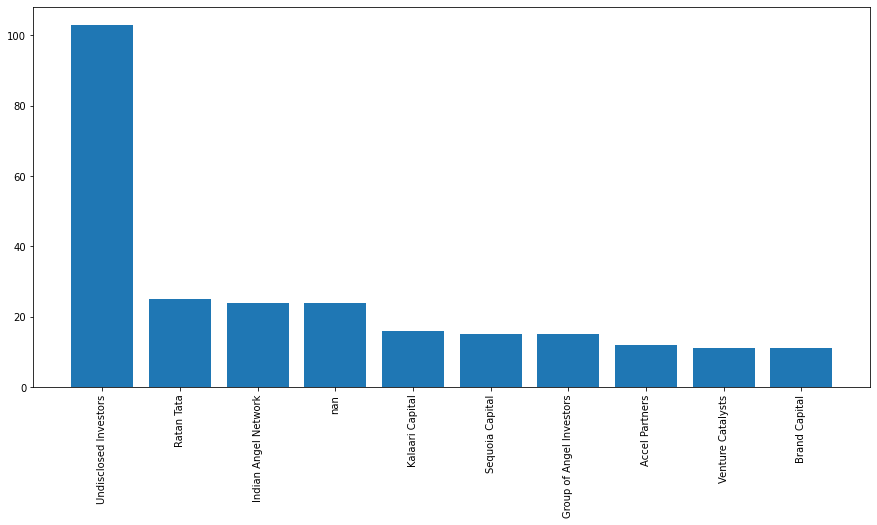

In [40]:
fig,ax = plt.subplots(figsize = (15,7))
ax.bar(data["Investors"].value_counts().head(10).index,data["Investors"].value_counts().head(10).values)
ax.tick_params(axis = "x",labelrotation=90)

#### Inference from the above plot: The identities of most of the Inverstors are not disclosed. From the ones disclosed, Ratan Tata tops the list of people funding the Startus most. 

In [41]:
#finding the top 10 investors based on the total amount they have invested
inv = data[["Investors","AmountUSD"]][data["Investors"] != "nan"].groupby(by = "Investors").sum().sort_values(by = "AmountUSD",ascending = False).head(10)
inv
l = []
for i in inv.values:
    l.append(int(i))

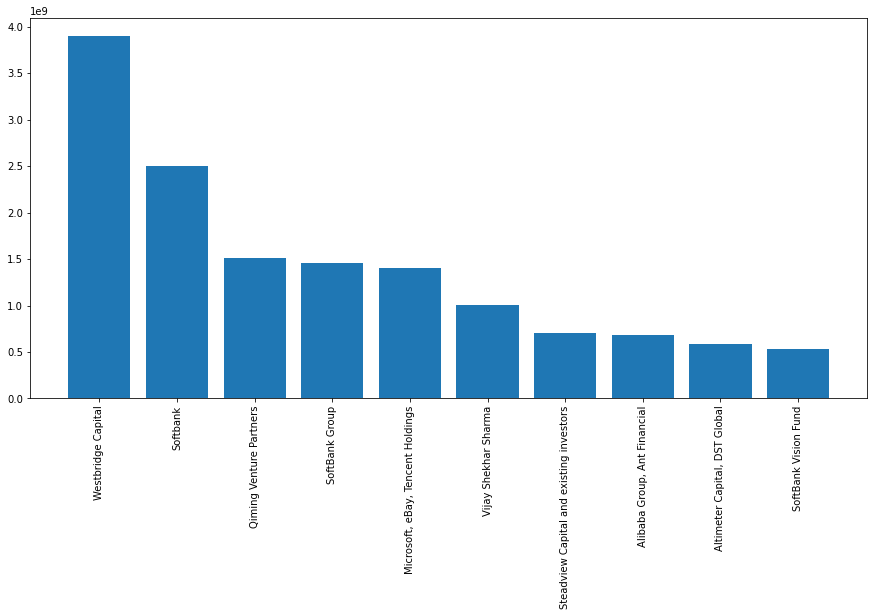

In [42]:
fig,ax = plt.subplots(figsize = (15,7))
ax.bar(inv.index,l)
ax.tick_params(axis = "x",labelrotation=90)